<a href="https://colab.research.google.com/github/andrewburner/msds422-covid/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
#url = "https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_01/data/MSDS422_covid19_20200825v3.csv"
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
data = pd.read_csv(url,  sep=',')
df = pd.DataFrame(data)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,20/09/2020,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657
1,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
3,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
4,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649


In [175]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [176]:
df.shape

(43927, 12)

In [177]:
df.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [178]:
df.countriesAndTerritories.nunique()

210

In [179]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [180]:
df.dateRep.nunique()

265

In [181]:
df['dateRep']=pd.to_datetime(df['dateRep'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
df['dateRep']=pd.to_datetime(df['dateRep'], format='%Y/%m/%d')
df['dateRep'].head()

0   2020-09-20
1   2020-09-19
2   2020-09-18
3   2020-09-17
4   2020-09-16
Name: dateRep, dtype: datetime64[ns]

In [182]:
df.dateRep.min()

Timestamp('2019-12-31 00:00:00')

In [183]:
df.dateRep.max()

Timestamp('2020-09-20 00:00:00')

In [184]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,43927.000000,43927.000000,43927.000000,43927.000000,43927.000000,4.386300e+04,41146.000000
mean,15.667608,5.635076,2019.998475,701.981059,21.804130,4.284112e+07,33.162436
std,8.760930,2.213146,0.039025,4372.394543,126.420562,1.577985e+08,76.350870
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.355982e+06,0.373990
50%,16.000000,6.000000,2020.000000,9.000000,0.000000,8.082359e+06,4.599023
75%,23.000000,7.000000,2020.000000,151.000000,3.000000,2.916192e+07,26.774247
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.433784e+09,1058.225943


In [185]:
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          190
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

In [186]:
negs = df[(df.cases < 0) | (df.deaths < 0)]
negs.shape

(24, 12)

In [187]:
df[df.isnull().any(axis=1)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
242,2020-01-12,12,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
243,2020-01-11,11,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
244,2020-01-10,10,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
245,2020-01-09,9,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
246,2020-01-08,8,1,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
43922,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43923,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43924,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43925,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [188]:
df[df['countryterritoryCode'].isnull()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
7790,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7791,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7792,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7793,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7794,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7849,2020-01-04,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7850,2020-01-03,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7851,2020-01-02,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
7852,2020-01-01,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN


In [189]:
df = df[(df.cases >= 0) & (df.deaths >= 0)]
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(0, inplace=True)
df = df[df['countryterritoryCode'].notnull()]

In [190]:
df.shape

(43840, 12)

In [195]:
df['cumCases'] = (df.set_index('dateRep')
.groupby('countriesAndTerritories')['cases']
.shift(1)
.expanding(1)
.sum())

In [199]:
df['cumDeaths'] = (df
.groupby('countriesAndTerritories')['deaths']
.shift(1)
.expanding(1)
.sum())

In [200]:
df['cumFatalityRate'] = df['cumDeaths'] / df['cumCases']

In [201]:
df.tail(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cumCases,cumDeaths,cumFatalityRate
9,2020-09-11,11,9,2020,28,0,Afghanistan,AF,AFG,38041757.0,Asia,1.164510,30552424.0,950612.0,0.031114
8,2020-09-12,12,9,2020,34,0,Afghanistan,AF,AFG,38041757.0,Asia,1.224970,30552452.0,950612.0,0.031114
7,2020-09-13,13,9,2020,35,0,Afghanistan,AF,AFG,38041757.0,Asia,1.309088,30552486.0,950612.0,0.031114
6,2020-09-14,14,9,2020,75,0,Afghanistan,AF,AFG,38041757.0,Asia,1.456294,30552521.0,950612.0,0.031114
5,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159,30552596.0,950612.0,0.031114
4,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,30552695.0,950618.0,0.031114
3,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,30552735.0,950628.0,0.031114
2,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,30552752.0,950628.0,0.031114
1,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,30552752.0,950628.0,0.031114
0,2020-09-20,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657,30552799.0,950629.0,0.031114


In [203]:
dfUSA = df[df['countriesAndTerritories'] == 'United_States_of_America']

In [205]:
dfUSA

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cumCases,cumDeaths,cumFatalityRate
42235,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000,144086.0,2188.0,0.015185
42234,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000,144086.0,2188.0,0.015185
42233,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000,144086.0,2188.0,0.015185
42232,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000,144086.0,2188.0,0.015185
42231,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,0.000000,144086.0,2188.0,0.015185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41975,2020-09-16,16,9,2020,51473,1407,United_States_of_America,US,USA,329064917.0,America,161.257239,6698906.0,196718.0,0.029366
41974,2020-09-17,17,9,2020,24598,865,United_States_of_America,US,USA,329064917.0,America,156.955352,6750379.0,198125.0,0.029350
41973,2020-09-18,18,9,2020,43567,831,United_States_of_America,US,USA,329064917.0,America,159.179230,6774977.0,198990.0,0.029371
41972,2020-09-19,19,9,2020,50209,956,United_States_of_America,US,USA,329064917.0,America,158.917275,6818544.0,199821.0,0.029306


Text(0.5, 1.0, 'US Cases Over Time')

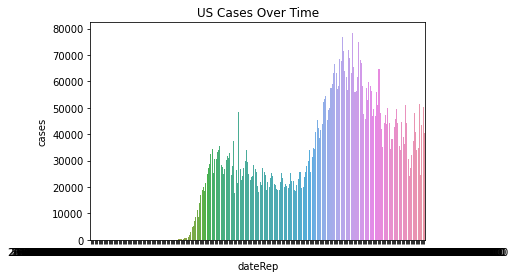

In [209]:
sns.barplot(x='dateRep', y='cases', data=dfUSA)
plt.title('US Cases Over Time')

Text(0.5, 1.0, 'US Deaths Over Time')

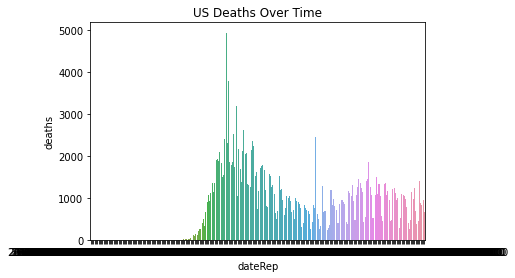

In [210]:
sns.barplot(x='dateRep', y='deaths', data=dfUSA)
plt.title('US Deaths Over Time')

Text(0.5, 1.0, 'US Rolling 14day Cases per 100k Over Time')

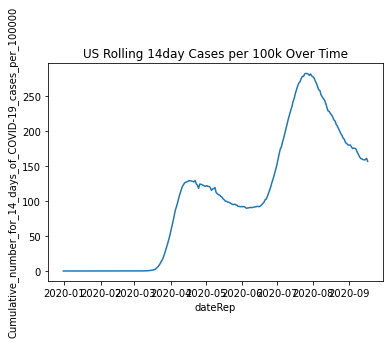

In [221]:
sns.lineplot(x='dateRep', y='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', data=dfUSA)
plt.title('US Rolling 14day Cases per 100k Over Time')

In [226]:
df['continentExp'].unique()

array(['Africa', 'Asia', 'America', 'Europe', 'Oceania'], dtype=object)

Text(0.5, 1.0, 'Deaths by Country')

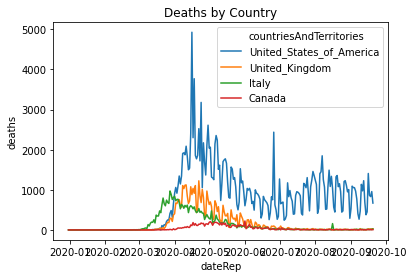

In [230]:
US_comps = ['United_States_of_America', 'United_Kingdom', 'Canada', 'Italy']
dfUScomps = df.loc[df['countriesAndTerritories'].isin(US_comps)]
sns.lineplot(x='dateRep', y='deaths', hue='countriesAndTerritories', data=dfUScomps)
plt.title('Deaths by Country')

Text(0.5, 1.0, 'Cases vs Deaths in the US')

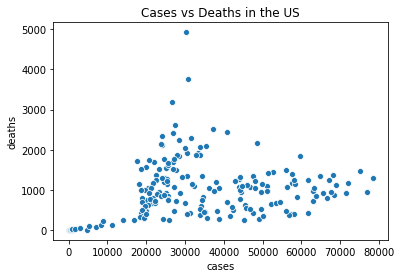

In [231]:
sns.scatterplot(x='cases', y='deaths', data=dfUSA)
plt.title('Cases vs Deaths in the US')

In [232]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [240]:
dfscale = dfUSA[['dateRep', 'cases', 'deaths']]


In [247]:
scaler = MinMaxScaler(feature_range=(0,1))
dfscale['scaled_cases'] = scaler.fit_transform(dfscale.cases.values.reshape(-1, 1))
dfscale['scaled_deaths'] = scaler.fit_transform(dfscale.deaths.values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [254]:
dfscale.tail()

,dateRep,cases,deaths,scaled_cases,scaled_deaths,standardscaled_cases,standardscaled_deaths
41978,2020-09-13,40820,685,0.520484,0.139002,0.718662,-0.088134
41977,2020-09-14,33871,378,0.431879,0.076705,0.396704,-0.497143
41976,2020-09-15,34841,451,0.444248,0.091518,0.441645,-0.399886
41975,2020-09-16,51473,1407,0.656317,0.285511,1.212234,0.873770
41974,2020-09-17,24598,865,0.313642,0.175528,-0.032930,0.151676


Text(0.5, 1.0, 'Min Max Scaled Cases Over Time')

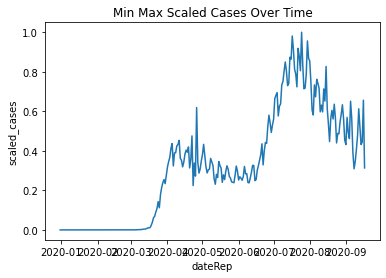

In [251]:
sns.lineplot(x='dateRep', y='scaled_cases', data=dfscale)
plt.title('Min Max Scaled Cases Over Time')

Text(0.5, 1.0, 'Min Max Scaled Deaths Over Time')

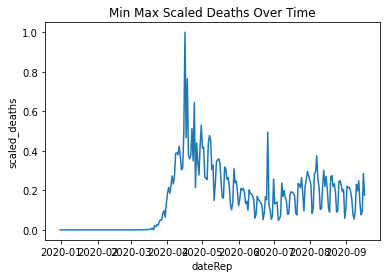

In [252]:
sns.lineplot(x='dateRep', y='scaled_deaths', data=dfscale)
plt.title('Min Max Scaled Deaths Over Time')

In [253]:
scaler = StandardScaler()
dfscale['standardscaled_cases'] = scaler.fit_transform(dfscale.cases.values.reshape(-1, 1))
dfscale['standardscaled_deaths'] = scaler.fit_transform(dfscale.deaths.values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Standard Scaled Cases Over Time')

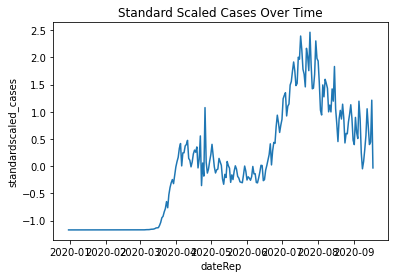

In [255]:
sns.lineplot(x='dateRep', y='standardscaled_cases', data=dfscale)
plt.title('Standard Scaled Cases Over Time')

Text(0.5, 1.0, 'Standard Scaled Deaths Over Time')

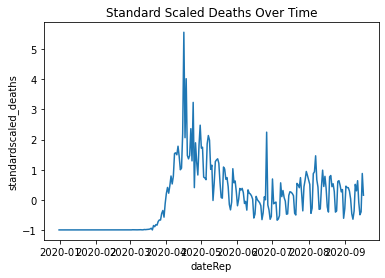

In [256]:
sns.lineplot(x='dateRep', y='standardscaled_deaths', data=dfscale)
plt.title('Standard Scaled Deaths Over Time')